In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc, mean_squared_error, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
validation_df = pd.read_csv('dataset_tratado/validation_df.csv')
train_df = pd.read_csv('dataset_tratado/train_df.csv')

In [4]:
train_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,-0.277804,-0.089306,-1.446976,-0.754370,-0.451942,-0.812200,0.026713,-0.568924,-0.797232,-1.436397,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,-0.216967,-1.004828,-1.446976,-2.083373,-1.279667,-0.812200,-1.460984,-1.438593,-1.564104,-1.436397,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,1.668967,-0.408911,1.656614,-0.754370,1.203508,0.852722,0.770562,1.170413,0.736513,0.832220,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,0.999764,1.976030,0.622084,1.239135,0.375783,0.020261,0.026713,0.300744,1.503385,0.832220,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,1.486457,-0.307045,-0.412446,-0.754370,-0.451942,0.852722,0.770562,-0.568924,0.736513,0.832220,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [5]:
X_train = train_df.drop(columns=['satisfaction']).values
y_train = train_df['satisfaction'].values

In [6]:
X_validation = validation_df.drop(columns=['satisfaction']).values
y_validation = validation_df['satisfaction'].values

### Treinando Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### Acurácia

In [11]:
y_pred = rf.predict(X_validation)

print("Acurácia:", accuracy_score(y_validation, y_pred))

Acurácia: 0.737506808278867


### Mean Squared Error

In [12]:
mse = mean_squared_error(y_validation, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2624931917211329


### Precisão

In [19]:
precision = precision_score(y_validation, y_pred, average='macro') # Calcula a precisão para cada classe e depois faz a média (não leva em conta o desequilíbrio das classes)
print(f"Precision Score Macro: {precision}")

precision = precision_score(y_validation, y_pred, average='micro') # Calcula a métrica globalmente contando os totais verdadeiros positivos, falsos negativos, e falsos positivos
print(f"Precision Score Micro: {precision}")

precision = precision_score(y_validation, y_pred, average='weighted') # Calcula a precisão para cada classe e depois faz a média ponderada pelo suporte (leva em conta o desequilíbrio das classes)
print(f"Precision Score Weighted: {precision}")

Precision Score Macro: 0.8171079772437928
Precision Score Micro: 0.737506808278867
Precision Score Weighted: 0.8171079772437928


### Recall

In [20]:
recall = recall_score(y_validation, y_pred, average='macro')
print(f"Recall: {recall}")

Recall: 0.7375068082788672


F1 Score

In [21]:
test_f1 = f1_score(y_validation, y_pred, average='macro')
print("Test F1-Score:", test_f1)

Test F1-Score: 0.7199309127345137


### Matriz de confusão

In [60]:
def plot_matrix(cm: np.ndarray):
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percent, annot=True, cmap='Blues', fmt='.1%', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

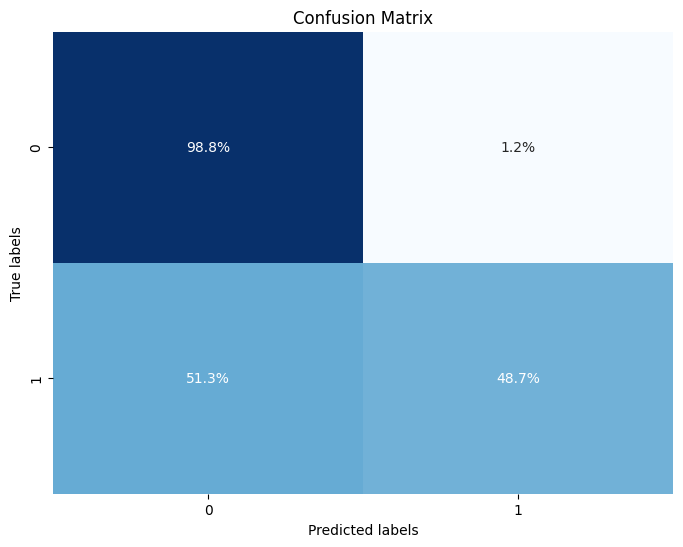

In [61]:
cm = confusion_matrix(y_validation, y_pred)
plot_matrix(cm)

### Curva ROC

In [62]:
# TODO: Plotar a curva ROC
# fpr, tpr, thresholds = roc_curve(y_validation, y_pred)
# roc_auc = auc(fpr, tpr)


### Curva KS

In [63]:
# TODO: Plotar a curva KS


KS: 0.4750136165577342
